In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style ='white')
sns.set(style='whitegrid',
       color_codes = True)

In [2]:
df = pd.read_csv('bank.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [6]:
categorical = df.select_dtypes(include=['object'])

In [7]:
categorical.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no


In [8]:
# Onehotencoding
df_categorical2 = pd.get_dummies(categorical,drop_first=True)


In [9]:
df_categorical2.columns

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')

In [10]:
df = df.drop(categorical.columns, axis=1)
df = pd.concat([df, df_categorical2], axis=1)
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 43 columns):
age                    4521 non-null int64
balance                4521 non-null int64
day                    4521 non-null int64
duration               4521 non-null int64
campaign               4521 non-null int64
pdays                  4521 non-null int64
previous               4521 non-null int64
job_blue-collar        4521 non-null uint8
job_entrepreneur       4521 non-null uint8
job_housemaid          4521 non-null uint8
job_management         4521 non-null uint8
job_retired            4521 non-null uint8
job_self-employed      4521 non-null uint8
job_services           4521 non-null uint8
job_student            4521 non-null uint8
job_technician         4521 non-null uint8
job_unemployed         4521 non-null uint8
job_unknown            4521 non-null uint8
marital_married        4521 non-null uint8
marital_single         4521 non-null uint8
education_secondary    4521 non-n

## Checking for Outliers

In [12]:
num_df = df[['age','balance','day','duration', 'pdays']]

In [13]:
num_df.describe(percentiles=[.25,.5,.75,.90,.95,.99]) ## Should i drop rows balance and pdays

,age,balance,day,duration,pdays
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,39.766645
std,10.576211,3009.638142,8.247667,259.856633,100.121124
min,19.000000,-3313.000000,1.000000,4.000000,-1.000000
25%,33.000000,69.000000,9.000000,104.000000,-1.000000
50%,39.000000,444.000000,16.000000,185.000000,-1.000000
75%,49.000000,1480.000000,21.000000,329.000000,-1.000000
90%,56.000000,3913.000000,28.000000,579.000000,183.000000
95%,59.000000,6102.000000,30.000000,763.000000,317.000000
99%,72.000000,14194.600000,31.000000,1259.000000,370.000000


In [14]:
df.isnull().sum()

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_other         0


In [15]:
# Normalising continuous features
df1 = df[['age','balance','day', 'duration', 'pdays']]

In [16]:
normalized_df=(df1-df1.mean())/df1.std()

In [17]:
df = df.drop(['age','balance','day', 'duration', 'pdays'],1)


In [18]:
df = pd.concat([df,normalized_df],axis=1)

In [19]:
df.head(5)

,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes,age,balance,day,duration,pdays
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,-1.056153,0.121058,0.374011,-0.711782,-0.407173
1,1,4,0,0,0,0,0,0,1,0,...,0,0,0,0,0,-0.772497,1.118521,-0.595961,-0.169175,2.988713
2,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,-0.583394,-0.024142,0.010271,-0.303865,2.898822
3,4,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,-1.056153,0.017724,-1.565932,-0.249989,-0.407173
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1.685850,-0.472701,-1.323439,-0.146086,-0.407173


## Checking the deposit signup rate 

In [21]:
df['y']=df['y_yes']
df=df.drop(['y_yes'],axis=1)
deposit = (sum(df['y'])/len(df['y'].index))*100

In [22]:
deposit ##12% deposit rate, so my model needs to beat 88% accuracy

11.523999115239992

# Model Building

## Splitting Data into Training and Test Sets

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Putting feature variable to X
X = df.drop(['y'],axis=1)

# Putting response variable to y
y = df['y']

In [25]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: uint8

In [26]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)


# Running Your First Training Model

In [27]:
import statsmodels.api as sm ## this shows the long form breakdown of a linear model

### A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.

### Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.

In [28]:
# Logistic regression model, we have GLM --- Generalized Linear Model, for Linear Regression we had OLS--Ordinary Least Squares
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3121
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -787.24
Date:                Mon, 24 Jun 2019   Deviance:                       1574.5
Time:                        23:58:46   Pearson chi2:                 3.72e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.0203      0.519     -1.968      0.049      -2.037      -0.004
campaign               -0.0614      0.033     -1.857      0.063      -0.126       0.003
previous                0.0335      0.048      0.700      0.484      -0.060       0.127
job_blue-collar        -0.4619      0.274     -1.688      0.091      -0.998       0.074
job_entrepreneur       -0.9186      0.486     -1.888      0.059      -1.872       0.035
job_housemaid          -0.4046      0.470     -0.861      0.389      -1.325       0.516
job_management         -0.2028      0.276     -0.734      0.463      -0.745       0.339
job_retired             0.6042      0.354      1.708      0.088      -0.089       1.298
job_self-employed      -0.6731      0.438     -1.537      0.124      -1.531       0.185
job_services           -0.1628      0.303     -0.538      0.591      -0.756       0.430
job_student            -0.2392      0.495     -0.484      0.629      -1.209       0.730
job_technician         -0.4955      0.264     -1.875      0.061      -1.014       0.022
job_unemployed         -1.1362      0.521     -2.183      0.029      -2.156      -0.116
job_unknown             0.2928      0.705      0.415      0.678      -1.089       1.675
marital_married        -0.4884      0.200     -2.437      0.015      -0.881      -0.096
marital_single         -0.3699      0.235     -1.575      0.115      -0.830       0.090
education_secondary     0.4286      0.252      1.700      0.089      -0.066       0.923
education_tertiary      0.6368      0.288      2.207      0.027       0.071       1.202
education_unknown      -0.1409      0.430     -0.327      0.743      -0.984       0.703
default_yes             0.7164      0.464      1.543      0.123      -0.193       1.626
housing_yes            -0.3888      0.163     -2.387      0.017      -0.708      -0.070
loan_yes               -0.7306      0.232     -3.155      0.002      -1.184      -0.277
contact_telephone      -0.2968      0.287     -1.034      0.301      -0.860       0.266
contact_unknown        -1.4604      0.262     -5.567      0.000      -1.975      -0.946
month_aug              -0.7264      0.287     -2.535      0.011      -1.288      -0.165
month_dec              -0.1039      0.694     -0.150      0.881      -1.463       1.255
month_feb              -0.1150      0.344     -0.334      0.739      -0.790       0.560
month_jan              -1.2292      0.434     -2.835      0.005      -2.079      -0.379
month_jul              -1.2053      0.290     -4.160      0.000      -1.773      -0.637
month_jun               0.3521      0.339      1.038      0.299      -0.313       1.017
month_mar               1.0215      0.430      2.376      0.018       0.179       1.864
month_may              -0.7966      0.268     -2.970      0.003      -1.322      -0.271
month_nov              -0.9622      0.308     -3.121      0.002      -1.566      -

## Correlation Matrix

In [29]:
c = X.corr().abs()
s= c.unstack()
s



campaign  campaign               1.000000
          previous               0.067833
          job_blue-collar        0.008783
          job_entrepreneur       0.012910
          job_housemaid          0.015051
          job_management         0.030158
          job_retired            0.024452
          job_self-employed      0.032040
          job_services           0.002964
          job_student            0.017734
          job_technician         0.008999
          job_unemployed         0.006255
          job_unknown            0.007136
          marital_married        0.022000
          marital_single         0.008093
          education_secondary    0.019510
          education_tertiary     0.022631
          education_unknown      0.020508
          default_yes            0.012348
          housing_yes            0.003574
          loan_yes               0.017120
          contact_telephone      0.026571
          contact_unknown        0.004882
          month_aug              0

In [30]:
correlation_order = s.sort_values(kind="quicksort")
corr_df=pd.DataFrame(correlation_order).reset_index()
corr_df[corr_df[0]>0.7][corr_df[0]<1]

C:\Users\ayush\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,level_0,level_1,0
1718,marital_single,marital_married,0.763919
1719,marital_married,marital_single,0.763919
1720,poutcome_unknown,pdays,0.867713
1721,pdays,poutcome_unknown,0.867713


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
Z = add_constant(X.iloc[:, 1:])
vif=pd.Series([variance_inflation_factor(Z.values, i) 
               for i in range(Z.shape[1])], 
              index=Z.columns)
vif

const                  78.576422
previous                1.903169
job_blue-collar         2.631575
job_entrepreneur        1.382639
job_housemaid           1.295951
job_management          3.172256
job_retired             1.749935
job_self-employed       1.401521
job_services            1.722066
job_student             1.257559
job_technician          2.252252
job_unemployed          1.273550
job_unknown             1.128833
marital_married         2.469104
marital_single          2.783633
education_secondary     2.690467
education_tertiary      3.377669
education_unknown       1.316072
default_yes             1.019061
housing_yes             1.433882
loan_yes                1.062383
contact_telephone       1.105353
contact_unknown         2.452561
month_aug               3.085343
month_dec               1.090191
month_feb               1.839630
month_jan               1.556683
month_jul               3.134762
month_jun               3.498169
month_mar               1.191484
month_may 

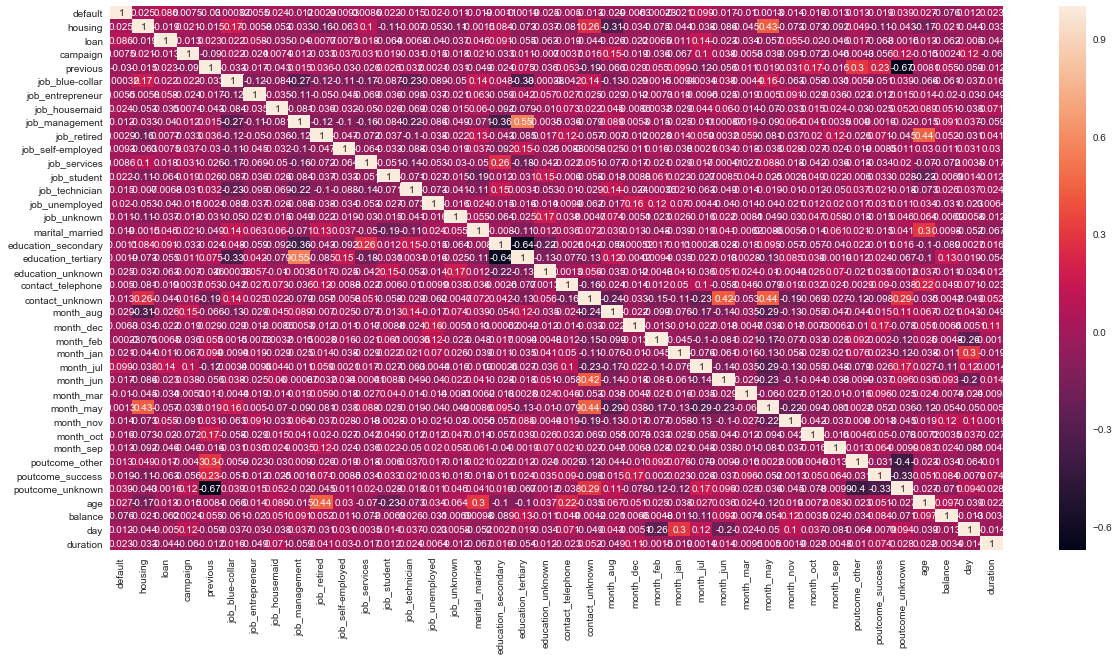

In [38]:
plt.figure(figsize = (20,10))
sns.heatmap(X_test2.corr(),annot = True)

## Re-Running the Model

In [32]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3121
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -787.24
Date:                Tue, 25 Jun 2019   Deviance:                       1574.5
Time:                        00:00:24   Pearson chi2:                 3.72e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.0203      0.519     -1.968      0.049      -2.037      -0.004
campaign               -0.0614      0.033     -1.857      0.063      -0.126       0.003
previous                0.0335      0.048      0.700      0.484      -0.060       0.127
job_blue-collar        -0.4619      0.274     -1.688      0.091      -0.998       0.074
job_entrepreneur       -0.9186      0.486     -1.888      0.059      -1.872       0.035
job_housemaid          -0.4046      0.470     -0.861      0.389      -1.325       0.516
job_management         -0.2028      0.276     -0.734      0.463      -0.745       0.339
job_retired             0.6042      0.354      1.708      0.088      -0.089       1.298
job_self-employed      -0.6731      0.438     -1.537      0.124      -1.531       0.185
job_services           -0.1628      0.303     -0.538      0.591      -0.756       0.430
job_student            -0.2392      0.495     -0.484      0.629      -1.209       0.730
job_technician         -0.4955      0.264     -1.875      0.061      -1.014       0.022
job_unemployed         -1.1362      0.521     -2.183      0.029      -2.156      -0.116
job_unknown             0.2928      0.705      0.415      0.678      -1.089       1.675
marital_married        -0.4884      0.200     -2.437      0.015      -0.881      -0.096
marital_single         -0.3699      0.235     -1.575      0.115      -0.830       0.090
education_secondary     0.4286      0.252      1.700      0.089      -0.066       0.923
education_tertiary      0.6368      0.288      2.207      0.027       0.071       1.202
education_unknown      -0.1409      0.430     -0.327      0.743      -0.984       0.703
default_yes             0.7164      0.464      1.543      0.123      -0.193       1.626
housing_yes            -0.3888      0.163     -2.387      0.017      -0.708      -0.070
loan_yes               -0.7306      0.232     -3.155      0.002      -1.184      -0.277
contact_telephone      -0.2968      0.287     -1.034      0.301      -0.860       0.266
contact_unknown        -1.4604      0.262     -5.567      0.000      -1.975      -0.946
month_aug              -0.7264      0.287     -2.535      0.011      -1.288      -0.165
month_dec              -0.1039      0.694     -0.150      0.881      -1.463       1.255
month_feb              -0.1150      0.344     -0.334      0.739      -0.790       0.560
month_jan              -1.2292      0.434     -2.835      0.005      -2.079      -0.379
month_jul              -1.2053      0.290     -4.160      0.000      -1.773      -0.637
month_jun               0.3521      0.339      1.038      0.299      -0.313       1.017
month_mar               1.0215      0.430      2.376      0.018       0.179       1.864
month_may              -0.7966      0.268     -2.970      0.003      -1.322      -0.271
month_nov              -0.9622      0.308     -3.121      0.002      -1.566      -

### Feature Selection Using RFE

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg)             
rfe = rfe.fit(X_train,y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking
print(rfe.get_params)
print(rfe.estimator_)

C:\Users\ayush\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[False False False  True False False  True False False False False  True
 False  True False  True  True False  True  True  True False  True  True
 False False  True  True False  True  True  True  True  True  True  True
 False False False False  True False]
[17 20  4  1  8 13  1  3 14 16  5  1  9  1  2  1  1 11  1  1  1  6  1  1
 21 10  1  1  7  1  1  1  1  1  1  1 12 19 22 18  1 15]
<bound method BaseEstimator.get_params of RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=None, step=1, verbose=0)>
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0

C:\Users\ayush\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ayush\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ayush\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ayush\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ayush\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

In [35]:
type(X_train.columns)

pandas.core.indexes.base.Index

In [36]:
col=[]
for var in zip (rfe.support_, X_train.columns):##zip method will tie up the lists with each other, 
    if var[0]==True:
        col.append(var[1])
        print (var[1])

job_entrepreneur
job_retired
job_unemployed
marital_married
education_secondary
education_tertiary
default_yes
housing_yes
loan_yes
contact_unknown
month_aug
month_jan
month_jul
month_mar
month_may
month_nov
month_oct
month_sep
poutcome_other
poutcome_success
duration


In [37]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

C:\Users\ayush\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
#Comparing the model with StatsModels
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3142
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -796.50
Date:                Tue, 25 Jun 2019   Deviance:                       1593.0
Time:                        00:01:37   Pearson chi2:                 3.56e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.7590      0.244     -7.205      0.000      -2.238      -1.280
job_entrepreneur       -0.6359      0.439     -1.449      0.147      -1.496       0.224
job_retired             0.8345      0.248      3.370      0.001       0.349       1.320
job_unemployed         -0.8687      0.479     -1.814      0.070      -1.807       0.070
marital_married        -0.2795      0.137     -2.045      0.041      -0.547      -0.012
education_secondary     0.4891      0.208      2.352      0.019       0.081       0.897
education_tertiary      0.7176      0.220      3.268      0.001       0.287       1.148
default_yes             0.6904      0.461      1.498      0.134      -0.213       1.593
housing_yes            -0.3961      0.154     -2.569      0.010      -0.698      -0.094
loan_yes               -0.7062      0.229     -3.084      0.002      -1.155      -0.257
contact_unknown        -1.2889      0.214     -6.025      0.000      -1.708      -0.870
month_aug              -0.8317      0.219     -3.799      0.000      -1.261      -0.403
month_jan              -1.1074      0.389     -2.846      0.004      -1.870      -0.345
month_jul              -1.2588      0.237     -5.305      0.000      -1.724      -0.794
month_mar               0.9641      0.388      2.484      0.013       0.204       1.725
month_may              -0.8774      0.203     -4.319      0.000      -1.276      -0.479
month_nov              -0.9188      0.263     -3.491      0.000      -1.435      -0.403
month_oct               0.9620      0.347      2.772      0.006       0.282       1.642
month_sep               0.4308      0.445      0.969      0.333      -0.441       1.303
poutcome_other          0.5578      0.254      2.192      0.028       0.059       1.056
poutcome_success        2.2978      0.259      8.865      0.000       1.790       2.806
duration                1.0317      0.061     16.974      0.000       0.913       1.151
=======================================================================================
"""

## Data is ready so making predictions

In [40]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test[col])
y_pred


array([[0.89180046, 0.10819954],
       [0.94078412, 0.05921588],
       [0.21280971, 0.78719029],
       ...,
       [0.96595365, 0.03404635],
       [0.93124975, 0.06875025],
       [0.620461  , 0.379539  ]])

In [41]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.head()

,0,1
0,0.891800,0.108200
1,0.940784,0.059216
2,0.212810,0.787190
3,0.962636,0.037364
4,0.960244,0.039756


In [42]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [43]:
# Let's see the head
y_pred_1.head()

,1
0,0.108200
1,0.059216
2,0.787190
3,0.037364
4,0.039756


In [44]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,y
3731,0
2367,0
1166,1
2973,1
2139,0


In [45]:
y_test_df['CustID'] = y_test_df.index
y_test_df.head()

,y,CustID
3731,0,3731
2367,0,2367
1166,1,1166
2973,1,2973
2139,0,2139


In [46]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [47]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
y_pred_final.head()

,y,CustID,1
0,0,3731,0.108200
1,0,2367,0.059216
2,1,1166,0.787190
3,1,2973,0.037364
4,0,2139,0.039756


In [48]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Deposit_Subs_prob', 'y': 'Deposit_Subs'})

In [49]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['CustID','Deposit_Subs','Deposit_Subs_prob'], axis=1)

C:\Users\ayush\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


In [50]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Deposit_Subs,Deposit_Subs_prob
0,3731,0,0.108200
1,2367,0,0.059216
2,1166,1,0.787190
3,2973,1,0.037364
4,2139,0,0.039756


In [51]:
# Creating new column 'predicted' with 1 if Deposit_sub_prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Deposit_Subs_prob.map( lambda x: 1 if x > 0.5 else 0)

In [52]:
# Let's see the head
y_pred_final.head()

,CustID,Deposit_Subs,Deposit_Subs_prob,predicted
0,3731,0,0.108200,0
1,2367,0,0.059216,0
2,1166,1,0.787190,1
3,2973,1,0.037364,0
4,2139,0,0.039756,0


### Model Evaluation

In [53]:
from sklearn import metrics

In [54]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Deposit_Subs, y_pred_final.predicted )
confusion

array([[1190,   25],
       [  97,   45]], dtype=int64)

In [61]:
# Predicted     not_subs    subs
# Actual
# not_Subs        1190      25
# subsc            99       43  

In [56]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Deposit_Subs, y_pred_final.predicted)

0.9100957995578481

In [57]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [58]:
# Let's see the sensitivity of our logistic regression model. 30% which means it can only predict when someone subscribed only 30% . 
TP / float(TP+FN)

0.31690140845070425

In [59]:
# Let us calculate specificity 
TN / float(TN+FP)

0.9794238683127572

In [60]:
# Calculate false postive rate - predicting Subscription when customer does not have subscribe
print(FP/ float(TN+FP))

0.0205761316872428


In [61]:
# positive predictive value 
print (TP / float(TP+FP))

0.6428571428571429


In [62]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9246309246309247


In [69]:
## looks like model is prediction customers who won't subscribe better than the one's who actually subscribe

### ROC Curve

In [63]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

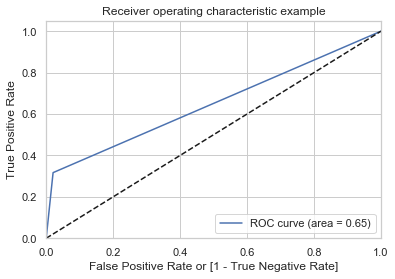

(array([0.        , 0.02057613, 1.        ]),
 array([0.        , 0.31690141, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [64]:
draw_roc(y_pred_final.Deposit_Subs, y_pred_final.predicted)

## Finding Optimal Cutoff Point

In [65]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Deposit_Subs_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,CustID,Deposit_Subs,Deposit_Subs_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,3731,0,0.108200,0,1,1,0,0,0,0,0,0,0,0
1,2367,0,0.059216,0,1,0,0,0,0,0,0,0,0,0
2,1166,1,0.787190,1,1,1,1,1,1,1,1,1,0,0
3,2973,1,0.037364,0,1,0,0,0,0,0,0,0,0,0
4,2139,0,0.039756,0,1,0,0,0,0,0,0,0,0,0


In [66]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.Deposit_Subs, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1    
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.104643  1.000000  0.000000
0.1   0.1  0.789978  0.852113  0.782716
0.2   0.2  0.890199  0.683099  0.914403
0.3   0.3  0.910833  0.584507  0.948971
0.4   0.4  0.913780  0.436620  0.969547
0.5   0.5  0.910096  0.316901  0.979424
0.6   0.6  0.909359  0.232394  0.988477
0.7   0.7  0.904200  0.169014  0.990123
0.8   0.8  0.898305  0.084507  0.993416
0.9   0.9  0.896094  0.035211  0.996708


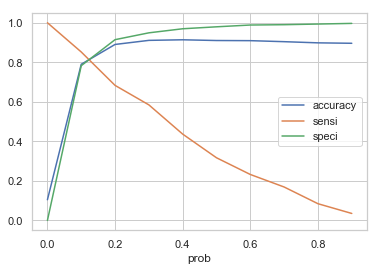

In [67]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [68]:
y_pred_final['final_predicted'] = y_pred_final.Deposit_Subs_prob.map( lambda x: 1 if x > 0.1 else 0)

In [69]:
y_pred_final.head()

,CustID,Deposit_Subs,Deposit_Subs_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,3731,0,0.108200,0,1,1,0,0,0,0,0,0,0,0,1
1,2367,0,0.059216,0,1,0,0,0,0,0,0,0,0,0,0
2,1166,1,0.787190,1,1,1,1,1,1,1,1,1,0,0,1
3,2973,1,0.037364,0,1,0,0,0,0,0,0,0,0,0,0
4,2139,0,0.039756,0,1,0,0,0,0,0,0,0,0,0,0
